In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import time

from ml_utilityfunc import *

'''Ipython notebook code for Machine Learning for Trading, L0104'''

# Statistics on time-series data
    # Global statistics:
        # stat = df.mean() --> mean of each column in ndarray form
        # can also do median, std, sum, prod, mode, and at least 33 stats
    # Rolling statistics:
        # snapshot stats over windows of data (e.g. over a certain date range)
        # e.g. 20-day rolling mean gives you the mean value over the past 20 days
        # move the window along the total time period
        # can do all types of rolling statistics
        # rolling mean (simple moving average) is a technical indicator for stocks
            # hypothesis: when price crosses SMA you have buying or selling opportunities
            #             but only when deviation from the rolling mean is significant enough
            #             --> can use rolling std to discover significance of trading signal
            #             --> Bollinger bands are used for this kind of measure
            #                 which is a band of 2 std above and below the rolling mean then
            #                 you should pay attention and may have a trading signal
        # Pandas has rolling statistics! --> e.g. pandas.stats.moments.rolling_mean()
            # you need to pass in a window of data, can't just execute on whole df
    # Daily returns:
        # one of the most important statistics
        # how much did the price go up or down in a given day?
        # calculated as: daily_ret[t]=(price[t]/price[t-1])-1 --> don't need to iterate, though
        # comparing daily returns between different assets can be useful
    # Cumulative returns:
        # cumret[t]=(price[t]/price[0])-1
    

def get_rolling_mean(values,window):
    return pd.rolling_mean(values,window=window)
    
def get_rolling_std(values,window):
     return pd.rolling_std(values,window=window)

def test_run():
    dates = pd.date_range('2012-07-01','2012-07-31')
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates, dropna=True)
    ax = df['SPY'].plot(title="SPY Rolling Mean", label='SPY')
    
    # compute global stats for each stock
    mean_stk = df.mean()
    median_stk = df.median()
    std_stk = df.std()
    #print mean_stk
    #print median_stk
    #print std_stk
    
    # rolling statistics calculation
    #rm_SPY = pd.rolling_mean(df['SPY'],window=20)
    
    rm_SPY = get_rolling_mean(df['SPY'],window=20)
    rstd_SPY = get_rolling_std(df['SPY'],window=20)
    upper,lower = get_bollinger_bands(rm_SPY,rstd_SPY)
    
    rm_SPY.plot(label='Rolling Mean', ax=ax)
    upper.plot(label='Upper Band', ax=ax)
    lower.plot(label='Lower Band', ax=ax)
    
    ax.legend(loc='upper left')
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
    # compute daily returns
    daily_ret = compute_daily_returns(df)
    plot_data(daily_ret, title="Daily Returns", 
              ylabel="Daily Returns", xlabel="Date")
    
    # compute cumulative returns
    cum_ret = compute_cumulative_returns(df)
    plot_data(cum_ret, title="Cumulative Returns", 
              ylabel="Cumulative Returns", xlabel="Date")
    

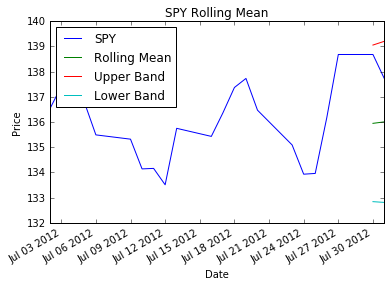

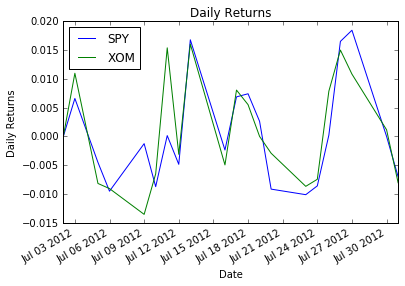

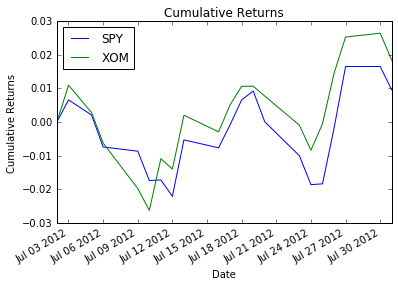

In [2]:
test_run()